<a href="https://colab.research.google.com/github/juliodyna/Cursos/blob/main/Imersao_Aula3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução
crosstab;
groupby;
scatterplot;
lmplot;
melt;
corr;
heatmap




In [ ]:
import pandas as pd

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [ ]:
pd.crosstab(dados['dose'], dados['tempo']) #tabela de frequência - value_counts com mais dimensões

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento']) #tabela de frequência com mais um argumento

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize=True) #normalizou os dados pelo total de todas as celulas==1 

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.012640   0.150542
     48         0.014403   0.168430
     72         0.012892   0.151172
D2   24         0.012808   0.150374
     48         0.012808   0.150794
     72         0.012808   0.150332

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize='index') #normalizou os dados pelo total da contagem da linha==1 

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='mean') #tabela de frquencia com a função agregada escolhida

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

In [ ]:
dados[['g-0', 'g-3']] #slice

,g-0,g-3
0,1.0620,-0.6208
1,0.0743,0.0604
2,0.6280,-0.0764
3,-0.5138,0.5288
4,-0.3254,0.6919
...,...,...
23809,0.1394,-0.5080
23810,-1.3260,0.9905
23811,0.3942,-0.7389
23812,0.6660,0.2044


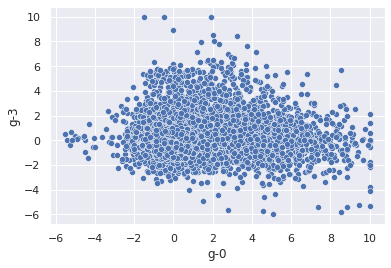

In [ ]:
import seaborn as sns
sns.set()
sns.scatterplot(x='g-0', y='g-3', data=dados) #gráfico de dispersão

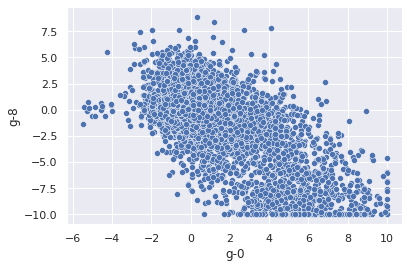

In [ ]:
sns.scatterplot(x='g-0', y='g-8', data=dados) #correlação negativa: quanto maior o g0, menor o g-8

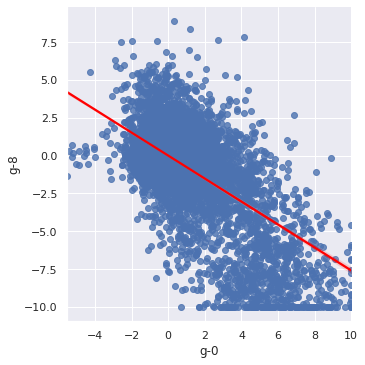

In [ ]:
sns.lmplot(data=dados, x='g-0', y='g-8', line_kws={'color':'red'}) #cria uma linha de tendência no gráfico de dispersão

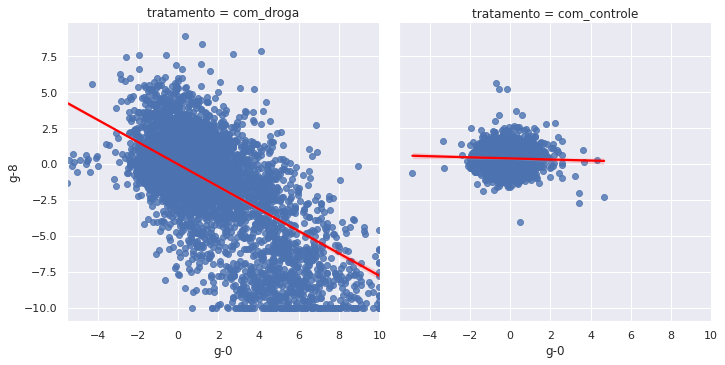

In [ ]:
sns.lmplot(data=dados, x='g-0', y='g-8', line_kws={'color':'red'}, col='tratamento')

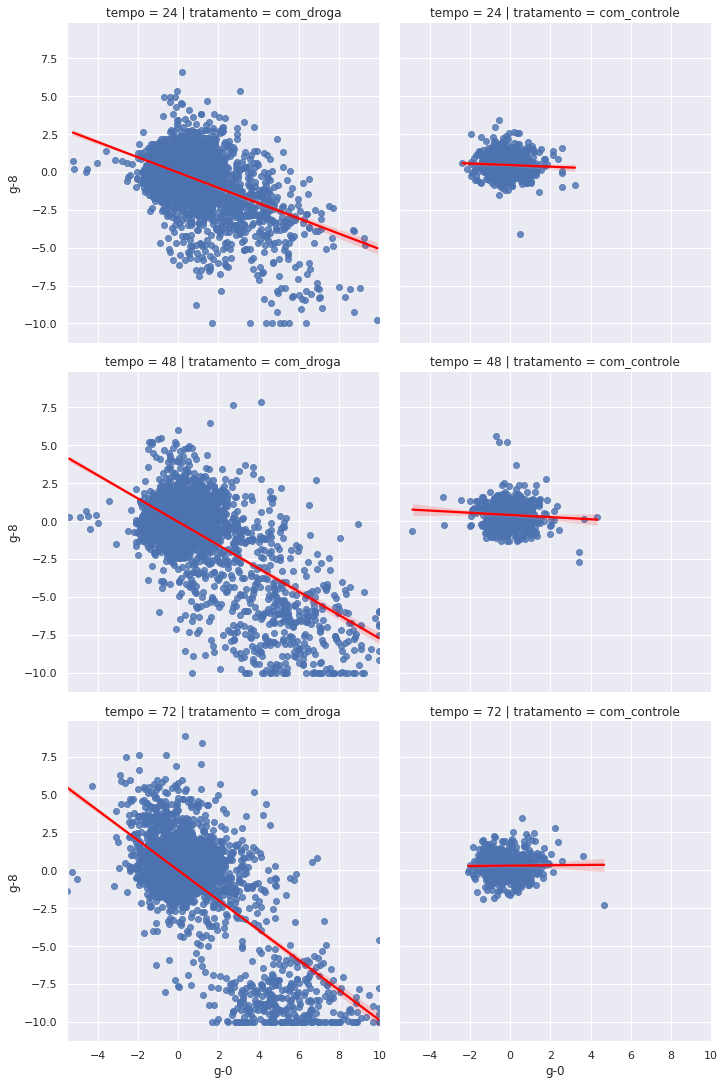

In [ ]:
sns.lmplot(data=dados, x='g-0', y='g-8', line_kws={'color':'red'}, col='tratamento', row='tempo')

In [ ]:
dados.loc[:,'g-0':'g-771'].head()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,g-732,g-733,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-744,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-760,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,-0.5119,-0.2162,...,-0.9041,-0.8089,0.6598,-0.4772,0.1289,-0.0297,0.4564,-0.1447,0.4683,-0.1722,0.9998,1.2860,-0.6166,0.0963,1.6340,-0.8744,0.4931,-0.0283,-0.3110,-0.1117,-0.4528,1.3240,-0.0503,-1.2750,-0.1750,-0.6972,-0.2720,0.2931,1.5280,0.3453,-0.5055,-0.3167,1.0930,0.0084,0.8611,-0.5582,0.3008,1.6490,0.2968,-0.0224
1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,-0.2568,-0.0455,...,3.1050,0.0204,-0.0961,0.2919,-0.4584,0.0556,0.9844,-0.6653,-0.3092,-0.1507,-0.9481,-0.1966,0.8554,0.5839,-1.6840,0.0648,0.5845,0.0891,-0.5025,-0.1047,0.3764,-1.4800,-0.2947,0.2745,-0.5234,0.1575,-0.1214,0.0476,0.1657,1.0310,-0.5338,0.0224,-0.4831,0.2128,-0.6999,-0.1214,-0.1626,-0.3340,-0.3289,-0.2718
2,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,-0.1219,5.4470,1.0310,...,-0.4954,-0.1840,-1.1110,-0.5649,-0.2617,2.9120,2.7720,0.1523,-1.1230,-0.5340,-0.7937,0.3457,-0.6136,-0.0706,-0.7474,0.1795,-0.4674,-0.1552,0.6338,0.5130,-0.3625,0.0873,0.2689,-0.2174,0.7069,-0.6456,0.6822,0.2237,-0.3601,1.2780,2.5770,0.2356,1.3230,-1.3730,-0.2682,0.8427,0.5797,0.3143,0.8133,0.7923
3,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,-1.2690,3.0900,-0.3814,...,0.2239,0.4428,-0.2822,-0.8175,1.4930,-0.0711,-1.6250,-0.4317,-0.0239,0.5046,-0.8061,0.9736,1.2540,2.0730,0.6604,-0.4758,-0.1766,-0.8959,0.6560,-0.0875,0.1082,-0.7158,0.0712,-0.1939,0.4286,-1.0220,0.9017,1.1750,-0.5760,0.7801,-0.1292,3.4310,1.2720,-0.4733,-2.0560,0.5699,0.1996,0.4374,0.1588,-0.0343
4,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,1.0620,0.7888,-0.0848,...,-0.2094,1.1270,0.1874,-0.0465,1.0560,-0.6324,-0.3651,0.9485,-0.6745,0.0479,-1.0470,-1.2440,-0.7675,0.2327,0.3698,1.4900,0.3632,1.4380,-0.5047,-0.2092,-0.4386,-1.1780,0.8236,1.0540,0.6745,-0.6354,-0.6745,-1.3780,0.7521,-0.9456,-0.6904,2.0540,-0.3131,-0.0809,0.3910,1.7660,-1.0020,-0.7534,0.5000,-0.6269


In [ ]:
dados.loc[:,'g-0':'g-771'].corr() #próxima de 1 ou -1 são variáveis com correlação alta, proporcinalmente(+) ou inversamente proporcionais (-)

In [16]:
corr = dados.loc[:,'g-0':'g-50'].corr()

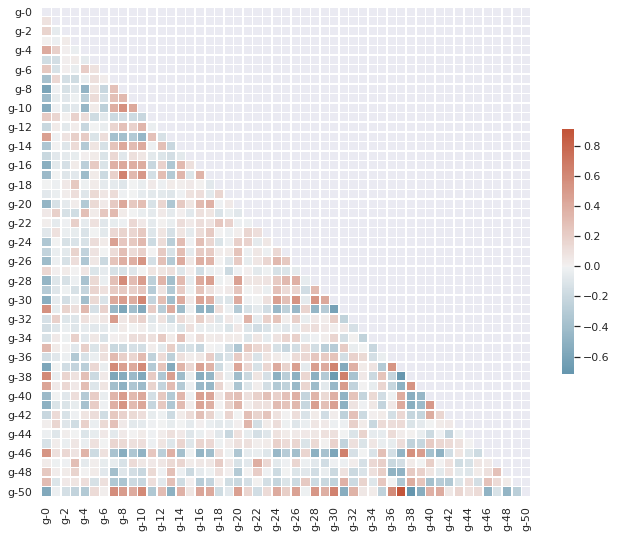

In [33]:
import numpy as np
import matplotlib.pyplot as plt


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [18]:
corr_cel = dados.loc[:,'c-0':'c-50'].corr() # c é a viabilidade celular(quantidade de células que sobreviveram ao composto - tratamento)

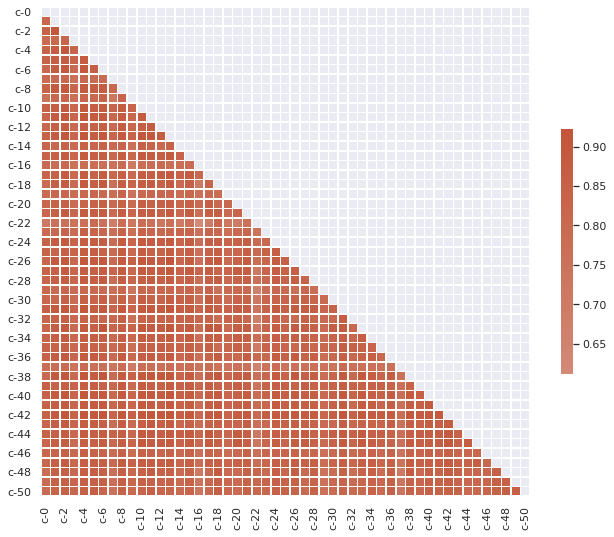

In [19]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_cel, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_cel, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [20]:
# tipos celulares apresentam alta correlação

#Desafio 1
Criar tabelas de frequência com pandas.groupby()

In [21]:
dados['dose'].value_counts()

D1    12147
D2    11667
Name: dose, dtype: int64

In [22]:
dados.groupby('dose') ['dose'].count() #nome da coluna a ser agrupada('dose') e especifica as colunas que serão agrupadas['dose']

dose
D1    12147
D2    11667
Name: dose, dtype: int64

In [23]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

In [24]:
dados.groupby(['dose', 'tempo', 'tratamento'],as_index=False) ['g-0'].mean()

,dose,tempo,tratamento,g-0
0,D1,24,com_controle,-0.251760
1,D1,24,com_droga,0.367996
2,D1,48,com_controle,-0.122773
3,D1,48,com_droga,0.412469
4,D1,72,com_controle,-0.295271
5,D1,72,com_droga,0.286250
6,D2,24,com_controle,0.010754
7,D2,24,com_droga,0.115253
8,D2,48,com_controle,0.013174
9,D2,48,com_droga,0.214480


In [25]:
dados.groupby(['dose', 'tempo', 'tratamento'],as_index=True) ['g-0'].mean().unstack() # solução com groupby

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

#Desafio 2
Normalizar o crosstab pela coluna

In [26]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize='columns') #normalizou os dados pelo total da contagem da linha==1 

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

#Desafio 3
Explorar outros agregadores

In [27]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='std') # desvio padrão

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.751395   1.461954
     48         0.853396   1.693903
     72         0.769294   1.458600
D2   24         0.836626   1.044999
     48         0.836845   1.315476
     72         0.878041   1.451532

In [28]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='max') # máximo

tratamento  com_controle  com_droga
dose tempo                         
D1   24            3.226      9.908
     48            3.423     10.000
     72            2.584      9.355
D2   24            2.601      7.167
     48            4.335     10.000
     72            4.670     10.000

In [29]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='var') # variância

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.564594   2.137311
     48         0.728284   2.869308
     72         0.591814   2.127514
D2   24         0.699943   1.092022
     48         0.700310   1.730477
     72         0.770956   2.106944

#Desafio 4
Explorar o melt

In [30]:
pd.melt(dados, id_vars='dose', value_vars='c-0')

,dose,variable,value
0,D1,c-0,-0.0600
1,D1,c-0,0.0927
2,D1,c-0,-0.1312
3,D1,c-0,-0.3998
4,D2,c-0,-0.3774
...,...,...,...
23809,D2,c-0,0.4224
23810,D2,c-0,0.2144
23811,D2,c-0,1.0650
23812,D1,c-0,0.5377


In [31]:
pd.melt(dados, id_vars='dose', value_vars=['c-0', 'c-1'])

,dose,variable,value
0,D1,c-0,-0.0600
1,D1,c-0,0.0927
2,D1,c-0,-0.1312
3,D1,c-0,-0.3998
4,D2,c-0,-0.3774
...,...,...,...
47623,D2,c-1,0.1871
47624,D2,c-1,0.4350
47625,D2,c-1,0.6329
47626,D1,c-1,1.3240


#Desafio 5
Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos

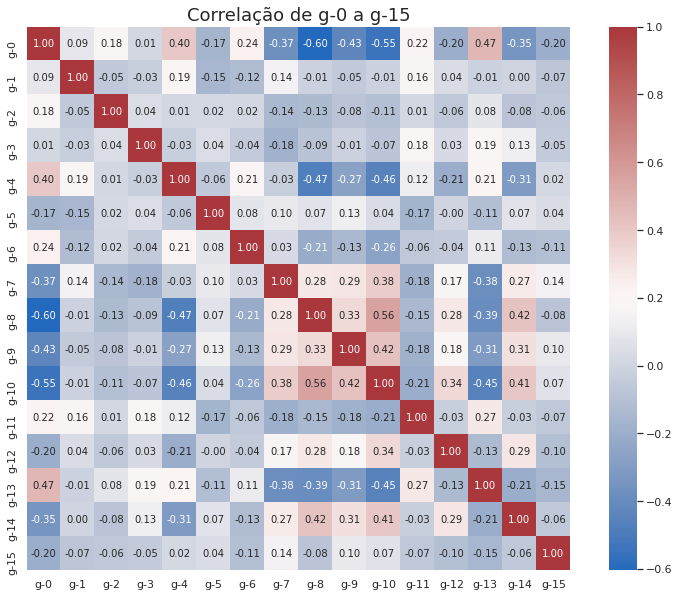

In [75]:
#Correlação de g-0 a g-15
plt.figure(figsize=(14,10))
g_fifteen = sns.heatmap(dados.loc[:,'g-0':'g-15'].corr(), annot=True, annot_kws={'size':10}, cmap = 'vlag', fmt='0.2f', square=True)
g_fifteen.set_title('Correlação de g-0 a g-15', fontsize=18)
plt.show()

In [77]:
#Selecionar g-0 a g-49 e c-0 a c-49 numa mesma tabela
g = dados[dados['tratamento'] == 'com_droga'].loc[:,'g-0':'g-49']
c = dados[dados['tratamento'] == 'com_droga'].loc[:,'c-0':'c-49']
g_c = pd.concat([g, c], axis=1) #axis=1 concatena por coluna
g_c

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,c-10,c-11,c-12,c-13,c-14,c-15,c-16,c-17,c-18,c-19,c-20,c-21,c-22,c-23,c-24,c-25,c-26,c-27,c-28,c-29,c-30,c-31,c-32,c-33,c-34,c-35,c-36,c-37,c-38,c-39,c-40,c-41,c-42,c-43,c-44,c-45,c-46,c-47,c-48,c-49
0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,-0.5119,-0.2162,...,0.9084,0.6857,1.0620,0.7602,-0.1048,0.3594,0.6376,-0.2798,-0.4010,0.6842,1.1560,0.3522,-0.3971,-0.2115,-0.2687,0.5196,0.1594,0.8920,0.6485,0.6078,0.3799,-0.1727,0.3817,0.3600,0.5124,-0.1414,0.6159,0.4689,-0.0773,0.4728,-0.0143,-0.5344,0.3578,0.3248,0.8903,0.3431,1.0340,1.3070,-1.0230,0.7709
1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,-0.2568,-0.0455,...,0.7787,0.2074,1.1110,0.2433,0.2010,0.7094,-0.4210,-0.2274,0.4045,0.1138,0.9950,0.0087,0.4864,-0.0140,0.0164,0.1759,0.6654,0.3556,0.8175,0.0474,0.5589,0.4481,0.1888,0.3712,0.7837,0.6860,0.4123,0.1560,-0.1203,-1.2780,0.6743,0.7358,0.1334,-0.5193,0.2281,0.0158,-0.5658,0.6065,0.6259,0.4716
2,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,-0.1219,5.4470,1.0310,...,0.3084,-0.0899,-0.0397,-0.5077,-0.5072,0.0100,-0.6915,0.0643,-0.8927,-0.2048,0.0773,0.5971,-0.1602,-0.2028,-0.2216,-1.1380,0.3668,-1.0620,-0.7736,0.6225,0.6274,-0.3038,0.1171,-0.0550,-0.0289,1.1740,-0.7937,-1.0610,-0.6409,0.3884,-1.0330,-0.0055,0.1212,-0.7020,-0.7065,-0.5192,-0.3181,0.1787,0.3354,0.1349
3,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,-1.2690,3.0900,-0.3814,...,-2.2730,-4.6920,-1.2750,-1.4970,-0.0156,-1.9350,-1.3430,-0.5252,-2.7210,-0.2524,0.9197,-3.1220,-1.9180,-0.6761,-2.8360,-1.6890,-4.4990,-1.5190,-2.2730,-0.3250,0.1895,-2.4220,0.0670,-1.9870,-0.6482,-0.0023,-1.9930,-0.8042,-3.6160,-0.3487,-1.2560,-2.7220,-2.1970,-2.9030,-1.1030,-2.3020,-2.0030,-1.3390,-3.0160,-3.0040
4,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,1.0620,0.7888,-0.0848,...,0.9642,-0.0853,0.1559,0.1419,0.1197,0.6774,0.1332,-0.5176,0.1232,0.0827,0.6995,0.5953,1.0600,-0.4255,0.8624,1.0010,0.0840,-0.6553,-0.1093,0.0587,0.5490,0.6331,0.5227,0.2186,0.2781,0.8947,-0.0202,0.5966,0.2249,0.5671,0.6382,-0.3909,0.7040,0.1462,0.0655,-0.5605,0.5903,-0.2353,-0.1285,-0.1740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23808,0.1608,-1.0500,0.2551,-0.2239,-0.2431,0.4256,-0.1166,-0.1777,-0.7480,0.1368,0.5493,-0.5083,0.4112,0.1181,0.7861,-0.1877,0.2476,0.1956,0.0273,0.1182,-0.5037,-0.5939,0.4825,-0.5187,0.1618,-0.2253,0.3153,0.4839,0.0520,1.3850,0.6502,-0.4198,0.272

In [100]:
corr_gc = g_c.corr()
corr_gc

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,c-10,c-11,c-12,c-13,c-14,c-15,c-16,c-17,c-18,c-19,c-20,c-21,c-22,c-23,c-24,c-25,c-26,c-27,c-28,c-29,c-30,c-31,c-32,c-33,c-34,c-35,c-36,c-37,c-38,c-39,c-40,c-41,c-42,c-43,c-44,c-45,c-46,c-47,c-48,c-49
g-0,1.000000,0.071546,0.176710,0.023815,0.410954,-0.170003,0.257568,-0.406262,-0.614090,-0.437885,-0.566067,0.221179,-0.209361,0.488840,-0.358997,-0.200232,-0.523170,-0.443493,-0.000410,-0.085089,-0.472862,0.038699,0.016291,-0.088633,-0.353608,-0.238430,-0.428393,0.151791,-0.484860,-0.308278,-0.540069,0.575238,-0.151090,-0.148153,-0.128371,0.336791,-0.153650,-0.598671,0.616227,0.461049,...,-0.631267,-0.639009,-0.638204,-0.649221,-0.631769,-0.654796,-0.647906,-0.685883,-0.602646,-0.652285,-0.692599,-0.638388,-0.551494,-0.589398,-0.667832,-0.613271,-0.626699,-0.669674,-0.656304,-0.623334,-0.661569,-0.667790,-0.654234,-0.663180,-0.657777,-0.649266,-0.613794,-0.574442,-0.635751,-0.653988,-0.625254,-0.653620,-0.662391,-0.627147,-0.662955,-0.659771,-0.610167,-0.660685,-0.603942,-0.617839
g-1,0.071546,1.000000,-0.050010,-0.011016,0.164478,-0.144854,-0.115735,0.128779,-0.002324,-0.041429,-0.001983,0.161415,0.044962,-0.006111,0.009942,-0.072744,-0.059215,0.006892,-0.023821,-0.037649,-0.107562,0.178893,-0.073339,0.088869,-0.016528,-0.018288,-0.003705,0.010195,-0.090239,-0.087303,-0.045608,-0.045241,0.179629,-0.085679,0.047933,0.026557,-0.073354,0.009270,-0.046251,0.034999,...,-0.000406,-0.018677,-0.009377,-0.026069,-0.008973,0.012306,-0.012649,-0.016771,0.004802,0.005705,-0.001482,-0.005209,0.064228,0.024969,-0.005086,0.030136,-0.010881,-0.011836,-0.018977,-0.007342,0.002220,-0.028096,-0.012174,-0.004820,0.017972,0.000671,-0.024020,-0.029830,-0.018491,0.008753,-0.024750,-0.003445,0.015599,-0.020082,-0.003708,-0.000775,-0.007487,0.009141,0.003686,0.035052
g-2,0.176710,-0.050010,1.000000,0.040901,0.025538,0.014120,0.020787,-0.153612,-0.130559,-0.085536,-0.114650,0.011606,-0.063864,0.087185,-0.089409,-0.060799,-0.139968,-0.088768,0.046446,0.030037,-0.068204,-0.130767,-0.013376,-0.036385,-0.133718,-0.070799,-0.126588,0.032480,-0.134140,-0.025407,-0.159548,0.172952,-0.099526,-0.027519,-0.021312,0.008755,-0.027444,-0.159744,0.172619,0.144790,...,-0.183782,-0.179848,-0.184618,-0.186750,-0.179063,-0.186363,-0.166349,-0.182311,-0.172443,-0.175079,-0.187206,-0.175657,-0.139594,-0.196196,-0.174218,-0.174531,-0.183952,-0.187791,-0.165804,-0.169211,-0.182060,-0.189801,-0.188333,-0.192037,-0.178599,-0.192573,-0.164413,-0.164059,-0.185017,-0.187677,-0.183443,-0.179047,-0.197008,-0.169533,-0.191062,-0.181752,-0.170008,-0.177350,-0.163114,-0.171502
g-3,0.023815,-0.011016,0.040901,1.000000,-0.018447,0.045729,-0.033596,-0.172864,-0.091251,-0.021091,-0.089094,0.191058,0.025939,0.200727,0.124575,-0.060579,0.030569,-0.076094,0.237965,0.121072,0.018768,-0.155799,0.204079,-0.040606,-0.111889,0.176060,0.102015,-0.005121,-0.031577,-0.138747,-0.054637,0.098129,-0.086426,-0.096574,0.185830,-0.060562,-0.335630,-0.238887,0.084089,0.061662,...,-0.062921,-0.077454,-0.085367,-0.084904,-0.076119,-0.045331,-0.060695,-0.092087,-0.070007,-0.027848,-0.074604,-0.075205,0.071067,-0.004557,-0.064364,-0.008839,-0.116677,-0.072987,-0.090697,-0.040629,-0.061310,-0.103075,-0.044514,-0.097905,-0.046912,-0.051421,-0.082451,-0.035557,-0.106948,-0.030679,-0.089946,-0.049676,-0.070976,-0.072866,-0.067165,-0.078023,-0.034812,-0.073337,-0.062495,-0.036906
g-4,0.410954,0.164478,0.025538,-0.018447,1.000000,-0.061317,0.217751,-0.078081,-0.483885,-0.277567,-0.461466,0.114970,-0.205246,0.230727,-0.313437,0.015216,-0.294585,-0.429069,-0.010755,-0.105519,-0.306332,0.256019,-0.057792,-0.128306,-0.149150,-0.233332,-0.338317,0.082062,-0.360675,-0.236218,-0.409160,0.349982,0.064737,-0.039841,-0.074381,0.202561,-0.114055,-0.282911,0.306875,0.308945,...,-0.389328,-0.395741,-0.392238,-0.397727,-0.409085,-0.392998,

In [112]:
corr_filtro = corr_gc.loc[:'g-49','c-0':]
corr_filtro

,c-0,c-1,c-2,c-3,c-4,c-5,c-6,c-7,c-8,c-9,c-10,c-11,c-12,c-13,c-14,c-15,c-16,c-17,c-18,c-19,c-20,c-21,c-22,c-23,c-24,c-25,c-26,c-27,c-28,c-29,c-30,c-31,c-32,c-33,c-34,c-35,c-36,c-37,c-38,c-39,c-40,c-41,c-42,c-43,c-44,c-45,c-46,c-47,c-48,c-49
g-0,-0.631908,-0.633972,-0.647684,-0.613628,-0.612773,-0.637636,-0.677327,-0.616219,-0.650315,-0.640832,-0.631267,-0.639009,-0.638204,-0.649221,-0.631769,-0.654796,-0.647906,-0.685883,-0.602646,-0.652285,-0.692599,-0.638388,-0.551494,-0.589398,-0.667832,-0.613271,-0.626699,-0.669674,-0.656304,-0.623334,-0.661569,-0.667790,-0.654234,-0.663180,-0.657777,-0.649266,-0.613794,-0.574442,-0.635751,-0.653988,-0.625254,-0.653620,-0.662391,-0.627147,-0.662955,-0.659771,-0.610167,-0.660685,-0.603942,-0.617839
g-1,-0.031841,-0.023024,-0.031111,0.018946,-0.018574,0.003835,-0.019734,0.008728,-0.007597,0.020418,-0.000406,-0.018677,-0.009377,-0.026069,-0.008973,0.012306,-0.012649,-0.016771,0.004802,0.005705,-0.001482,-0.005209,0.064228,0.024969,-0.005086,0.030136,-0.010881,-0.011836,-0.018977,-0.007342,0.002220,-0.028096,-0.012174,-0.004820,0.017972,0.000671,-0.024020,-0.029830,-0.018491,0.008753,-0.024750,-0.003445,0.015599,-0.020082,-0.003708,-0.000775,-0.007487,0.009141,0.003686,0.035052
g-2,-0.171517,-0.184193,-0.181112,-0.161156,-0.183858,-0.173981,-0.183792,-0.180489,-0.182216,-0.167339,-0.183782,-0.179848,-0.184618,-0.186750,-0.179063,-0.186363,-0.166349,-0.182311,-0.172443,-0.175079,-0.187206,-0.175657,-0.139594,-0.196196,-0.174218,-0.174531,-0.183952,-0.187791,-0.165804,-0.169211,-0.182060,-0.189801,-0.188333,-0.192037,-0.178599,-0.192573,-0.164413,-0.164059,-0.185017,-0.187677,-0.183443,-0.179047,-0.197008,-0.169533,-0.191062,-0.181752,-0.170008,-0.177350,-0.163114,-0.171502
g-3,-0.040447,-0.098196,-0.091010,-0.031864,-0.071537,-0.058413,-0.126018,-0.033997,-0.064860,-0.103608,-0.062921,-0.077454,-0.085367,-0.084904,-0.076119,-0.045331,-0.060695,-0.092087,-0.070007,-0.027848,-0.074604,-0.075205,0.071067,-0.004557,-0.064364,-0.008839,-0.116677,-0.072987,-0.090697,-0.040629,-0.061310,-0.103075,-0.044514,-0.097905,-0.046912,-0.051421,-0.082451,-0.035557,-0.106948,-0.030679,-0.089946,-0.049676,-0.070976,-0.072866,-0.067165,-0.078023,-0.034812,-0.073337,-0.062495,-0.036906
g-4,-0.418163,-0.390767,-0.404131,-0.370920,-0.374063,-0.397658,-0.375925,-0.390228,-0.396062,-0.358063,-0.389328,-0.395741,-0.392238,-0.397727,-0.409085,-0.392998,-0.401529,-0.400897,-0.351092,-0.407625,-0.419154,-0.390438,-0.330064,-0.364843,-0.404968,-0.383920,-0.365114,-0.418491,-0.393804,-0.394452,-0.387028,-0.403220,-0.429168,-0.377855,-0.404727,-0.395321,-0.395304,-0.371573,-0.375350,-0.400766,-0.392955,-0.398868,-0.370842,-0.405079,-0.399347,-0.402600,-0.368500,-0.405866,-0.360632,-0.362597
g-5,0.215371,0.205295,0.217897,0.200823,0.213457,0.210168,0.198405,0.179293,0.209578,0.167370,0.191885,0.213617,0.188461,0.220107,0.190828,0.197126,0.191831,0.189556,0.190585,0.213077,0.184087,0.209095,0.193316,0.185451,0.209798,0.205619,0.194752,0.207934,0.199321,0.206192,0.186216,0.203950,0.199239,0.173663,0.192136,0.202817,0.217381,0.204096,0.192948,0.203270,0.208914,0.209800,0.201371,0.222624,0.190481,0.187191,0.204539,0.195338,0.200061,0.200240
g-6,-0.118444,-0.095505,-0.095426,-0.104579,-0.068764,-0.095677,-0.091937,-0.113589,-0.092803,-0.090424,-0.090620,-0.084238,-0.095650,-0.063329,-0.114652,-0.107949,-0.139300,-0.105447,-0.054371,-0.124094,-0.133384,-0.085188,-0.112382,-0.111425,-0.099015,-0.082861,-0.062665,-0.109195,-0.088290,-0.127910,-0.110152,-0.100654,-0.136601,-0.091109,-0.124429,-0.125791,-0.089104,-0.106929,-0.068012,-0.112415,-0.088069,-0.109664,-0.094626,-0.092004,-0.099901,-0.100421,-0.096084,-0.098873,-0.065790,-0.100598
g-7,0.506307,0.576042,0.587199,0.541146,0.585801,0.559655,0.611473,0.510641,0.586517,0.604179,0.576074,0.589004,0.608226,0.594255,0.530487,0.581070,0.517456,0.600305,0.588051,0.518390,0.578197,0.582095,0.474978,0.513744,0.589513,0.531786,0.609944,0.573304,0.592089,0.504028,0.555803,0.598498,0.532463

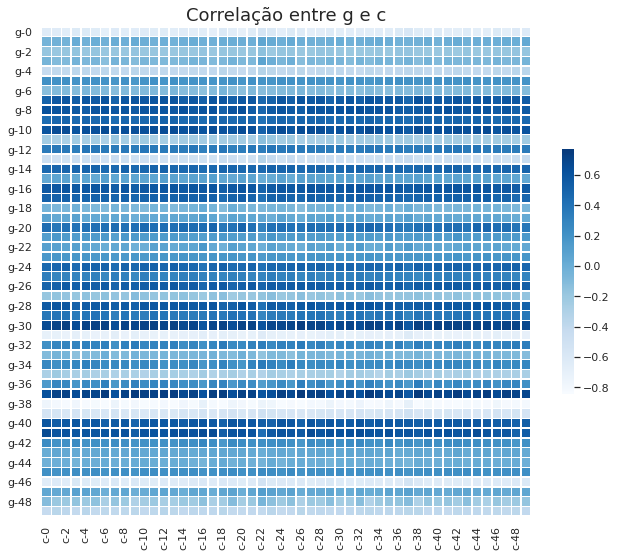

In [110]:
#Correlação entre os 50 primeiros g e c 
f, ax = plt.subplots(figsize=(11, 9))
gc_heat = sns.heatmap(corr_filtro, cmap = 'Blues', square=True, linewidths=.5, cbar_kws={"shrink": .5}, center=0)
gc_heat.set_title('Correlação entre g e c', fontsize=18)
plt.show()

In [ ]:
# As céluas mais escuras são genes que apresentam uma correlação positiva mais alta com a viabilidade celuar

#Desafio 6
Estudar o código que plota a matriz de correlação (heatmap)

In [61]:
corr_copy = dados.loc[:,'g-0':'g-50'].corr()

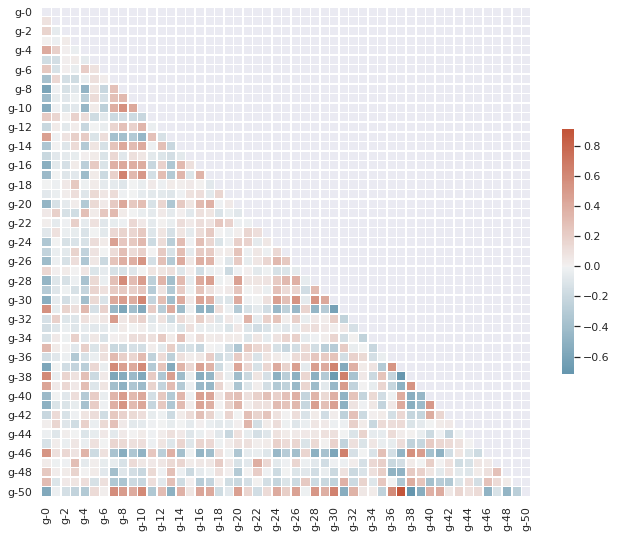

In [62]:

# Generate a mask for the upper triangle - Altera a forma da matriz de retangular para triangualar
mask = np.triu(np.ones_like(corr_copy, dtype=bool)) 

# Set up the matplotlib figure - Define o tamanho da figura plotada
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap - Escolhe a cor do gráfico
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio - Plotagem do gráfico com os parâmetros
sns.heatmap(corr_copy, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) #Square deixa as células quadradas e linewidth é a distância delas
                                                                 # cbs_kws 'shrink'- reduz o tamanho da barra de cor

#Desafio 7
Resumo do que você aprendeu com os dados:

crosstab: Com a tabela de frequência, podemos ter uma outra visão estatística dos dados e nos permite agregar a função de acordo com o objeto.

groupby: Maneira versátil de realizarmos agrupamentos específicos.

scatterplot: o gráfico de dipesão nos permite observar tendências e em alguns casos ficou muito clara a correlação negativa.

lmplot; Nos genes analisados, nos possibilitou a conclusão de que quando submetido ao composto sem_controle há uma certa estabilidade mesmo com tempos de exposição distintos.

melt: transforma linhas em colunas e mantém o id preservado
corr: calcula a correlação, base de quase todo o estudo da aula

heatmap: utilizamos o mapa de calor para verficar a correlação entre os genes a com viabilidade celular. Estudamos um pouco sobre seus parâmetros, de modo a deixá-lo mais legível.